In [1]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
def exp_ign(P):
    return - P * math.log(P, 2) - (1-P) * math.log(1-P, 2)

# Assuming some values for governing_prob, forecast_prob, and num_people
governing_prob = 0.97
forecast_prob = 0.999

def simulate_person(governing_prob, forecast_prob, N):
    log_scores = []
    for _ in range(N):
        outcome = random.random() < governing_prob
        log_score = math.log(forecast_prob, 2) if outcome else math.log(1 - forecast_prob, 2)
        log_scores.append(log_score)
    # For each N, I want the average log score up to that N: a list of averages
    return np.cumsum(log_scores) / np.arange(1, N+1)

In [4]:
np.cumsum([1,2,3,4]) / np.arange(1, 5)

array([1. , 1.5, 2. , 2.5])

In [30]:
medians = []
means = []
percentiles = []

N = 40
num_people = 500

# Many worlds
for world in range(1, num_people):
    # Simulate num_people and calculate the log scores
    log_scores = [simulate_person(governing_prob, forecast_prob, N) for _ in range(num_people)]

# Make a dataframe where columns are repetitions and rows are people
df = pd.DataFrame(log_scores)

# For each column (repetition) in df, get the median, mean, and 90th percentile
medians = df.median()
means = df.mean()
percentiles = df.quantile(0.1)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.691676,...,-0.892195,-0.864345,-0.838183,-0.813560,-0.790344,-0.768418,-0.747677,-0.728027,-0.709386,-0.691676
1,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,...,-0.223799,-0.216837,-0.210296,-0.204140,-0.198336,-0.192855,-0.187670,-0.182757,-0.178097,-0.173669
2,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,...,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001
3,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,...,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001
4,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,...,-0.223799,-0.216837,-0.210296,-0.204140,-0.198336,-0.192855,-0.187670,-0.182757,-0.178097,-0.173669


In [31]:
# Write df to a csv called "df_N40_R500.csv", no row names
df.to_csv(f"df_N{N+1}_{num_people}worlds_{governing_prob}governing_{forecast_prob}forecast.csv", index=False)

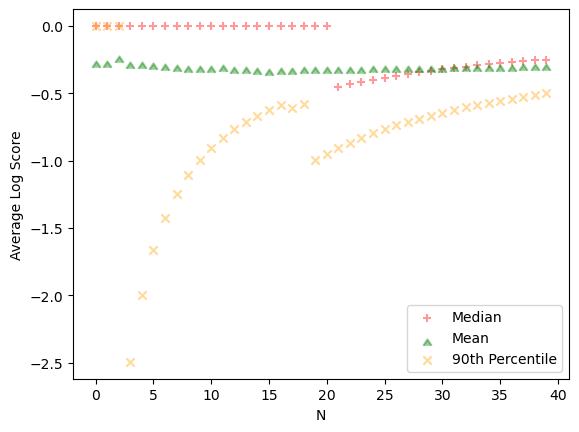

In [32]:
# Create line plots for median, mean, and percentile
N_values = range(N)
plt.scatter(N_values, medians, color='red', label='Median', marker = '+', alpha = 0.4)
plt.scatter(N_values, means, color='green', label='Mean', marker = 6, alpha = 0.4)
plt.scatter(N_values, percentiles, color='orange', label='90th Percentile', marker = 'x', alpha = 0.4)

# Set the labels for the x and y axes
plt.xlabel('N')
plt.ylabel('Average Log Score')

# Add a legend
plt.legend()

# Display the plot
plt.show()

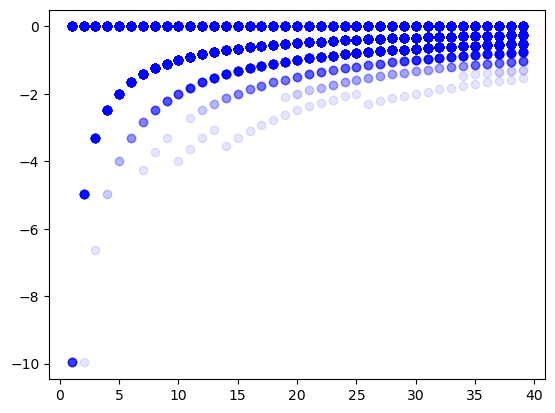

In [33]:
# On top of that, plot faintly all the log score dots (df) individually, in a column for each N
for N in range(1, N):
    plt.scatter([N] * num_people, df[N-1], color='blue', alpha=0.1)